In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from utils import data_tools, networks_factory, data_metrics
from utils.constants import const
%matplotlib inline

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

## Nnotice: no MinMaxScaler(feature_range=(-1, 1))

In [3]:
# load pima indians dataset
dataset, dates = data_tools.load_data_from_csv(const.DATA_DIR + "apple_interpolate.csv")
print("# shape: ", dataset.shape)
# print(dataset)

# reshape into X=t and Y=t+1
look_back = const.LOOK_BACK
dataX, dataY = data_tools.create_dataset(dataset, look_back)
print("# lenth: ", len(dataX), len(dataY))  # 应等于len(dataset)-look_back
print("# shape: ", dataX.shape)

# shape:  (1901, 1)
# lenth:  1871 1871
# shape:  (1871, 30)


In [4]:
# split into train and test sets; after create supervised data
# otherwise, if firstly 划分训练集和测试集，总的samples数目会减少：len(dataset - lookback) - (len(trainX)+len(testX))
train_size = int(len(dataX) * const.TRAIN_SCALE)
test_size = len(dataX) - train_size
trainX, testX = dataX[0:train_size,:], dataX[train_size:len(dataset),:]
trainY, testY = dataY[0:train_size], dataY[train_size:len(dataset)]
print("# lenth: ", len(trainX), len(testX))
print(len(dataX) == len(trainX)+len(testX))

# lenth:  1496 375
True


In [5]:
dim = look_back
# create model
s, model = networks_factory.create_bp_model(hidden_neurons=32, dims=dim, n_out=1)
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')  # notice: Classification problem and regression problem
# Fit the model
model.fit(trainX, trainY, epochs=10, batch_size=30, validation_split=const.VALIDATION_SCALE, verbose=1)

Train on 1122 samples, validate on 374 samples
Epoch 1/10
1122/1122 [==============================] - 0s 393us/step - loss: 66.1057 - val_loss: 0.8328
Epoch 2/10
1122/1122 [==============================] - 0s 44us/step - loss: 3.2109 - val_loss: 0.4179
Epoch 3/10
1122/1122 [==============================] - 0s 48us/step - loss: 2.4386 - val_loss: 0.2772
Epoch 4/10
1122/1122 [==============================] - 0s 45us/step - loss: 2.3135 - val_loss: 0.2707
Epoch 5/10
1122/1122 [==============================] - 0s 44us/step - loss: 2.2243 - val_loss: 0.2639
Epoch 6/10
1122/1122 [==============================] - 0s 57us/step - loss: 2.1419 - val_loss: 0.2560
Epoch 7/10
1122/1122 [==============================] - 0s 51us/step - loss: 2.0521 - val_loss: 0.2453
Epoch 8/10
1122/1122 [==============================] - 0s 59us/step - loss: 1.9541 - val_loss: 0.2540
Epoch 9/10
1122/1122 [==============================] - 0s 51us/step - loss: 1.8492 - val_loss: 0.2232
Epoch 10/10
1122/1122 [=

In [6]:
# calculate predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.14 RMSE
Test Score: 0.63 RMSE


In [7]:
# test slice
ans = [1, 2, 3, 4, 5, 6, 7, 8 , 9 ,10]
print(ans[1:5])

[2, 3, 4, 5]


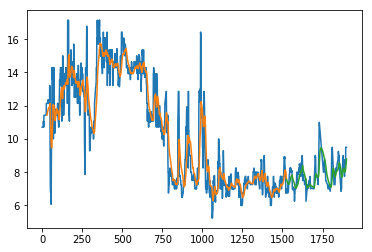

In [8]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict[:]  # index from a to b-1

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+look_back:len(dataset),:] = testPredict[:]

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## REFERENCE:
### JinkeyAI, https://www.jianshu.com/p/589ed0a8137d